In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [46]:
Raw_data=pd.read_excel('LD_NET.xlsx')
data1=Raw_data.iloc[:11621, 1:]
data1.head()

,MW01,MW02,MW03,MW04,MW05,MW06,MW07,MW08,MW09,MW10,...,MW15,MW16,MW17,MW18,MW19,MW20,MW21,MW22,MW23,MW24
0,6081,5771,5598,5543,5453,5418,5233,5353,5537,5527,...,5288,5317,5535,6143,6242,6019,5854,5711,5728,5506
1,5213,4929,4728,4723,4768,4962,5037,5546,6117,6225,...,6060,6031,6106,6750,7075,6765,6506,6348,6456,6136
2,5831,5548,5369,5319,5340,5459,5488,5904,6438,6604,...,6503,6462,6576,7272,7581,7413,7197,7042,6813,6548
3,5969,5625,5606,5622,5679,5886,6263,7052,8389,9141,...,9099,9005,9160,9565,9610,9034,8565,8299,8314,7844
4,7089,6899,6888,6866,6914,7096,7386,8049,9207,9709,...,9455,9352,9490,9942,9941,9407,8917,8612,8505,7973


In [47]:
print(len(data1))
data2=data1.values
data=data2.flatten()
print(len(data))

11621
278904


In [45]:
print(data[289000:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [10]:
weather_data=pd.read_excel('Work_Weather.xlsx')
weather_data.head()

,Point,Location,Date,Time,Precipitatin (mm),Wind speed(m/s),Wind direction (16방위),Humidity (%),Local Pressure (hPa),Sunshine (hr),Solar Radiation (MJ/m2),Snow (cm),Unnamed: 12
0,108,서울,2020-01-01,01:00:00,-5.9,1.7,50.0,40.0,1033.0,NaN,0.0,NaN,NaN
1,108,서울,2020-01-01,02:00:00,-5.7,0.1,0.0,42.0,1032.8,NaN,0.0,NaN,NaN
2,108,서울,2020-01-01,03:00:00,-5.6,0.0,0.0,0.0,46.0,1032.7,0.0,NaN,NaN
3,108,서울,2020-01-01,04:00:00,-5.4,0.0,0.0,50.0,1032.8,NaN,0.0,NaN,NaN
4,108,서울,2020-01-01,05:00:00,-5.2,0.0,0.0,55.0,1032.3,NaN,0.0,NaN,NaN


In [23]:
weather_data.fillna(0, inplace=True)
weather_data.describe()

,Point,Precipitatin (mm),Wind speed(m/s),Wind direction (16방위),Humidity (%),Local Pressure (hPa),Sunshine (hr),Solar Radiation (MJ/m2),Snow (cm),Unnamed: 12
count,8040.0,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000,8040.000000
mean,108.0,14.523022,2.241007,174.331841,73.001418,895.094055,130.331697,0.579295,0.033036,0.002612
std,0.0,9.458137,1.951360,120.806781,52.354400,313.889725,337.751764,0.915478,0.198006,0.093650
min,108.0,-11.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,108.0,6.900000,1.200000,50.000000,49.000000,1007.000000,0.000000,0.000000,0.000000,0.000000
50%,108.0,15.300000,2.000000,230.000000,64.000000,1014.600000,0.000000,0.000000,0.000000,0.000000
75%,108.0,22.700000,2.900000,290.000000,79.000000,1022.100000,1.000000,0.930000,0.000000,0.000000
max,108.0,35.200000,70.000000,360.000000,1002.400000,1037.100000,1033.400000,5.500000,5.100000,4.900000


In [35]:
solar_radiation=weather_data.iloc[:, 10]
solar_radiation.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Solar Radiation (MJ/m2), dtype: float64

In [36]:
solarRadiation_data=solar_radiation.values

In [37]:
Capacity=1000

Solar_capacity=Capacity*solarRadiation_data/4

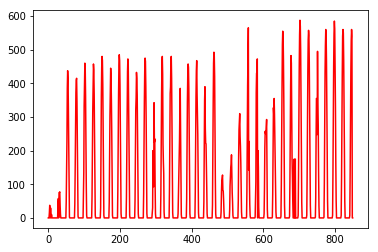

In [38]:
plt.plot(Solar_capacity[150:1000] ,'r-')
plt.show()

In [39]:
len(Solar_capacity)

8040

In [52]:
Net_data=data[270864:278904]
len(Net_data)

8040

In [67]:
Net_mean=Net_data.mean()
Net_std=Net_data.std()
Baseline=np.random.normal(0, Net_std/3, len(Net_data))+Net_mean+2*Net_std

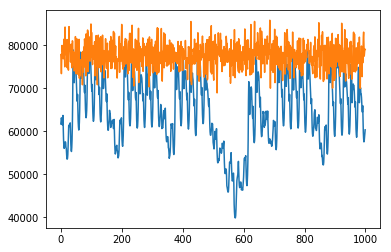

In [68]:
plt.plot(Net_data[1000:2000])
plt.plot(Baseline[1000:2000])
plt.show()

In [69]:
Net_PV_result=Baseline-Net_data

In [76]:
PV_Capacity=Net_PV_result.max()

In [77]:
EstimatedPV_capacity=PV_Capacity*solarRadiation_data/4

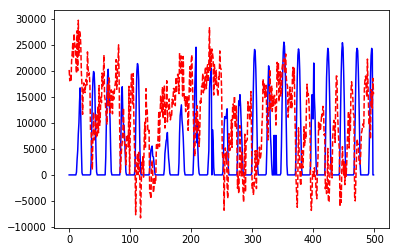

In [78]:
plt.plot(EstimatedPV_capacity[500:1000], 'b-')
plt.plot(Net_PV_result[500:1000], 'r--')
plt.show()

In [87]:
estimated_PV=[]
for i in range(0, len(Net_PV_result)-3):
    PV_out=np.convolve(Net_PV_result[i:i+3], EstimatedPV_capacity[i:i+3], 'valid')/50000
    estimated_PV.append(PV_out)

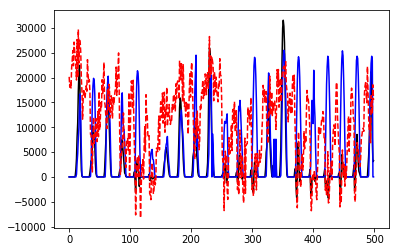

In [90]:
plt.plot(estimated_PV[500:1000], 'k-')
plt.plot(EstimatedPV_capacity[500:1000], 'b-')
plt.plot(Net_PV_result[500:1000], 'r--')
plt.show()

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [146]:
Net_series=pd.Series(Net_data)
result1=seasonal_decompose(Net_series, model='additive', freq=12, extrapolate_trend='freq')

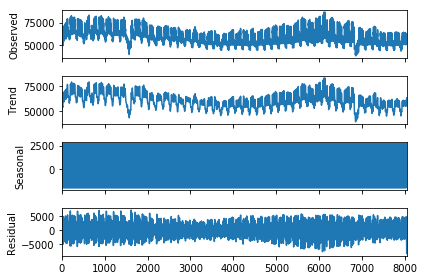

In [147]:
result1.plot()
plt.show()

In [148]:
est_PV=np.array(estimated_PV)
est_PV=est_PV.flatten()
Baseline1=Net_data[:8037]+est_PV

In [157]:
Base_series=pd.Series(Baseline1)
result2=seasonal_decompose(Base_series, model='additive', freq=24, extrapolate_trend='freq')

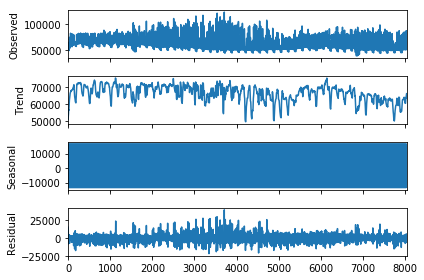

In [158]:
result2.plot()
plt.show()

In [165]:
Est_PV=(result2.seasonal -result1.seasonal) + (result2.resid -result1.resid) + 6000

In [166]:
est_result=Est_PV[:8037]

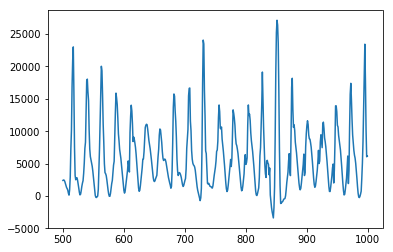

In [167]:
plt.plot(est_result[500:1000])
plt.show()